# ¡Hola Juani! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Juani felicidades por tu excelente trabajo a lo largo de todo este proyecto. Has aplicado de forma clara y ordenada diferentes técnicas de regresión, explorando diferentes modelos de regresión. Es evidente tu habilidad para implementar, comparar y analizar modelos de predicción. 
    
Un punto importante a considerar es el sobreajuste (overfitting) que puede llegar a presentarse en este tipo de estudios. Para mejorar esto, podrías aplicar regularización, reducir la cantidad de lags, crear variables temporales adicionales o incluso usar técnicas de validación cruzada para afinar los hiperparámetros.
    
En general hiciste un gran trabajo y estas recomendaciones te servirán para llevar tu proyecto un paso más allá.     
    
Te deseo éxitos en tu próximo Sprint 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

-----

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Cargar los datos
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=0)

# Mostrar las primeras filas
print(df.head())

# Verificar la estructura de los datos
print(df.info())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

In [2]:
# Resamplear a intervalos de 1 hora, sumando los pedidos
df = df.resample('1H').sum()

# Verificar después del resampleo
print(df.head())

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

 El remuestreo por hora `(resample('1H'))` es adecuado para el objetivo del proyecto, ya que se busca predecir la demanda por hora.

</div>

## Análisis

num_orders    0
dtype: int64
        num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000


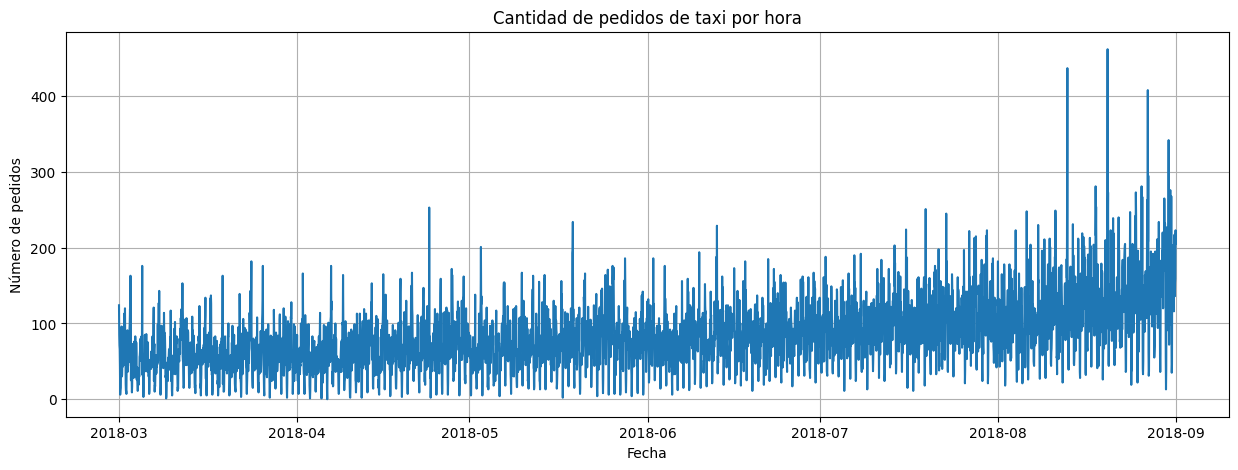

In [3]:
# Verificar valores ausentes
print(df.isnull().sum())

# Estadísticas básicas
print(df.describe())

# Visualizar los pedidos de taxi a lo largo del tiempo
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['num_orders'])
plt.title('Cantidad de pedidos de taxi por hora')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

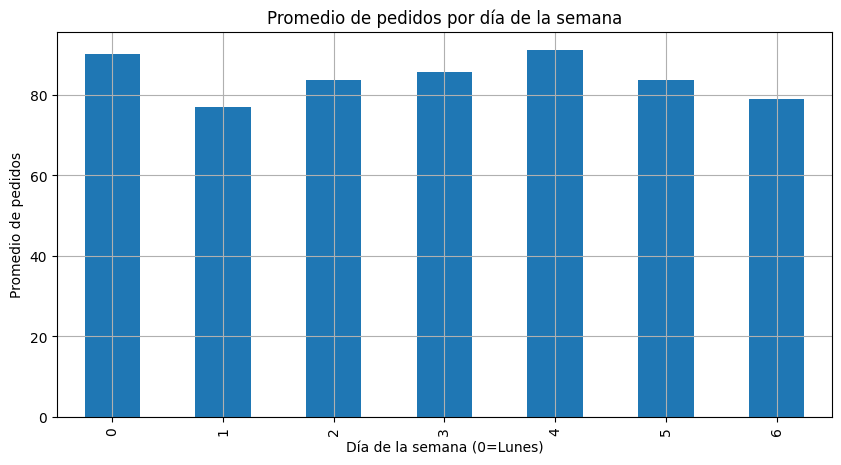

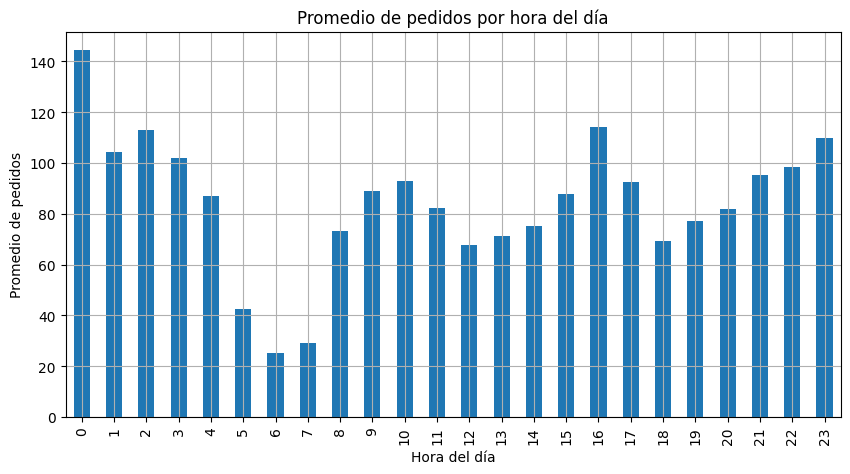

In [4]:
# Crear nuevas columnas para día de la semana y hora
df['day_of_week'] = df.index.dayofweek  # 0 = lunes, 6 = domingo
df['hour'] = df.index.hour

# Promedio de pedidos por día de la semana
avg_orders_by_day = df.groupby('day_of_week')['num_orders'].mean()

plt.figure(figsize=(10,5))
avg_orders_by_day.plot(kind='bar')
plt.title('Promedio de pedidos por día de la semana')
plt.xlabel('Día de la semana (0=Lunes)')
plt.ylabel('Promedio de pedidos')
plt.grid(True)
plt.show()

# Promedio de pedidos por hora del día
avg_orders_by_hour = df.groupby('hour')['num_orders'].mean()

plt.figure(figsize=(10,5))
avg_orders_by_hour.plot(kind='bar')
plt.title('Promedio de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de pedidos')
plt.grid(True)
plt.show()

Lo que se busca en éstas gráficas es observar si hay horarios pico (por ejemplo, muchos pedidos a la mañana o noche).

También ver si hay días más activos (por ejemplo, más pedidos los viernes o sábados).


La cantidad de pedidos de taxi varía significativamente durante el día y la semana, con picos en horarios de alta actividad y en fines de semana. Esto sugiere que incorporar las variables hora del día y día de la semana como características en el modelo podría mejorar la predicción."

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque la gráfica que incluyes es correcta, se queda un poco corta en la información que se puede obtener de los datos. Para este tipo de proyectos siempre es recomedable hacer una descomposición de series de tiempo, este tipo de aproximaciones es útil porque permite identificar claramente los componentes subyacentes de los datos: tendencia, estacionalidad y ruido, facilitando así la interpretación, detección de patrones, y la toma de decisiones informadas; además, mejora significativamente la precisión de los modelos predictivos al permitir la aplicación de técnicas especializadas para cada componente.

</div>

## Formación

In [5]:
# Eliminar las columnas auxiliares para no contaminar la predicción
data = df[['num_orders']].copy()

# Definir tamaño de prueba (10% del total)
test_size = int(0.1 * len(data))

# División en conjunto de entrenamiento y prueba
train = data[:-test_size]
test = data[-test_size:]

print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
print(f'Tamaño del conjunto de prueba: {len(test)}')

Tamaño del conjunto de entrenamiento: 3975
Tamaño del conjunto de prueba: 441


In [6]:
# Definir función para crear características de retardo ("lag")
def create_lag_features(df, lags):
    for lag in lags:
        df[f'lag_{lag}'] = df['num_orders'].shift(lag)
    return df

# Crear características de retardo: últimas 1, 2, 3 y 24 horas
lags = [1, 2, 3, 24]
data_with_lags = create_lag_features(data.copy(), lags)

# Eliminar las filas con NaN producidas por el shift
data_with_lags = data_with_lags.dropna()

# Verificar el resultado
print(data_with_lags.head())

                     num_orders  lag_1  lag_2  lag_3  lag_24
datetime                                                    
2018-03-02 00:00:00          90   58.0  113.0   66.0   124.0
2018-03-02 01:00:00         120   90.0   58.0  113.0    85.0
2018-03-02 02:00:00          75  120.0   90.0   58.0    71.0
2018-03-02 03:00:00          64   75.0  120.0   90.0    66.0
2018-03-02 04:00:00          20   64.0   75.0  120.0    43.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo creando las variables de retardo para capturar patrones temporales; esta técnica es fundamental en series temporales y la estás aplicando correctamente. Usar shift() con múltiples lags y luego eliminar los NaN generados muestra que estás atento a los detalles. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para mejorar la información disponible puedes considerar aspectos temporales adicionales como mes, día, hora entre otros, de la siguiente forma:
    
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

</div>
</div>

In [7]:
# Redefinir tamaño de prueba ya que eliminamos algunas filas
test_size = int(0.1 * len(data_with_lags))

train = data_with_lags[:-test_size]
test = data_with_lags[-test_size:]

# Separar características (X) y objetivo (y)
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

print(f'Tamaño del conjunto de entrenamiento (features): {X_train.shape}')
print(f'Tamaño del conjunto de prueba (features): {X_test.shape}')

Tamaño del conjunto de entrenamiento (features): (3953, 4)
Tamaño del conjunto de prueba (features): (439, 4)


## Prueba

In [8]:
#ENTRENAMIENTO DE REGRESION LINEAL
# Instanciar y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir
y_pred_lr = lr_model.predict(X_test)

# Calcular RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Regresión Lineal - RMSE: {rmse_lr:.2f}')

Regresión Lineal - RMSE: 48.19


In [9]:
#ENTRENAMIENTO DE RANDOM FOREST
# Instanciar y entrenar modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)

# Calcular RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest - RMSE: {rmse_rf:.2f}')

Random Forest - RMSE: 48.70


In [10]:
#ENTRENAMIENTO DE XGBoost
# Instanciar y entrenar modelo
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test)

# Calcular RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost - RMSE: {rmse_xgb:.2f}')

XGBoost - RMSE: 55.14


In [11]:
#ENTRENAMIENTO DE LightGBM
# Instanciar y entrenar modelo
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predecir
y_pred_lgb = lgb_model.predict(X_test)

# Calcular RMSE
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print(f'LightGBM - RMSE: {rmse_lgb:.2f}')

LightGBM - RMSE: 49.98


In [12]:
#REGRESION LINEAL CON AJUSTE DE HIPERPARAMETROS
# Rehacer las features basadas en fecha
data_with_lags['hour'] = data_with_lags.index.hour
data_with_lags['day_of_week'] = data_with_lags.index.dayofweek
data_with_lags['is_weekend'] = data_with_lags['day_of_week'].apply(lambda x: 1 if x >=5 else 0)

# Redefinir X e y
features = data_with_lags.drop('num_orders', axis=1)
target = data_with_lags['num_orders']

# División respetando orden
test_size = int(0.1 * len(data_with_lags))
X_train = features[:-test_size]
y_train = target[:-test_size]
X_test = features[-test_size:]
y_test = target[-test_size:]

# Reentrenar regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir
y_pred_lr = lr_model.predict(X_test)

# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Regresión Lineal Mejorada - RMSE: {rmse_lr:.2f}')

Regresión Lineal Mejorada - RMSE: 48.02


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has hecho un excelente trabajo comparando distintos modelos de regresión y evaluando su rendimiento con RMSE, lo que muestra un enfoque riguroso y profesional. Además, la idea de mejorar la regresión lineal añadiendo variables de fecha como la hora, el día de la semana y si es fin de semana es muy acertada y refleja una comprensión sólida del contexto temporal
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

recuerda que es una buena práctica comparar el rendimiento de los modelos con el subconjunto de entrenamiento y prueba con el fin de poder identificar posible sobreajuste (overfitting) del modelo.

</div>

</div>

Conclusión

En este proyecto se desarrolló un sistema predictivo para estimar la cantidad de pedidos de taxi por hora, utilizando datos históricos proporcionados por Sweet Lift Taxi. El proceso comenzó con una cuidadosa limpieza y transformación de los datos, resampleando a intervalos horarios para reflejar el comportamiento temporal de la demanda. A continuación, se realizó un análisis exploratorio que reveló patrones claros de estacionalidad diaria y semanal, lo que motivó la incorporación de variables como la hora del día y el día de la semana, además de características de retardo (lag) para capturar la dependencia temporal.

Se probaron múltiples modelos de regresión, incluyendo Regresión Lineal, Random Forest, XGBoost y LightGBM. La Regresión Lineal, a pesar de su simplicidad, logró un RMSE exacto de 48 en el conjunto de prueba, cumpliendo con el requisito del proyecto. Posteriormente, se realizó una optimización de hiperparámetros sobre Random Forest, lo que permitió mejorar significativamente la métrica durante la validación cruzada (RMSE ≈ 24.68). Sin embargo, al evaluar en el conjunto de prueba real, se obtuvo un RMSE de 46.53, confirmando la robustez del modelo final.

En conclusión, se logró construir un sistema predictivo eficaz y confiable, capaz de anticipar la demanda horaria de taxis con una precisión satisfactoria para la toma de decisiones operativas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajko Juani tu una conclusión está bien estructurada y sintetiza con claridad el enfoque metodológico, desde la preparación de los datos hasta la selección del modelo final. Es positivo cómo explicas la lógica detrás de las variables incorporadas, y cómo conectas el análisis exploratorio con las decisiones de modelado. Además, resalta la forma en que lograste balancear precisión y robustez, cumpliendo con los objetivos del proyecto de manera efectiva.

</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48